<a href="https://colab.research.google.com/github/SamueleBertani/Samuele/blob/main/samueleBertani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Progetto di esame: Stroke Prediction from clinical dataset

**Programmazione di Applicazioni Data Intensive**  
Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena

Samuele Bertani - Matricola 0000889633

`samuele.bertani@studio.unibo.it`

# Obbiettivo
Lo scopo di questo progetto è quello di predire, attraverso un dataset che andremo ad analizzare, se un paziente ha avuto uno ictus, dato rappresentato da una variabile discreta binaria.

# Predisposizione

Andiamo subito a fare il setup delle librirei che verrano utilizzate per il progetto:

In [81]:
import numpy as np
import pandas as pd
import seaborn as splot # libreria non utilizzata nelle esercitazioni ma volevo mostrare le mie competenze nel suo utilizzo
import matplotlib.pyplot as plt
%matplotlib inline

Importiamo poi il dataset che andremo a valutare:

In [7]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=",")

Controlliamo che il documento sia stato importato con successo:

In [8]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Introduzione Dataset

Andiamo ora a analizzare e comprendere il dataset.

Il dataset è stato scaricato dal seguente link di Kaggle:
https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Il dataset è utilizzabile per moditivi educativi e il creatore da citare è https://www.kaggle.com/fedesoriano.

Esso è composto da inserimenti di 12 colonne dove ognuno raffigura un paziente analizzato, le features indicano dati sul singolo paziente e sono di diversa tipologia. Andiamo ora ad analizzarle:

1. **id:** unique identifier
2. **gender**: "Male", "Female" or "Other"
3. **age**: age of the patient
4. **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. **ever_married**: "No" or "Yes"
7. **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. **Residence_type**: "Rural" or "Urban"
9. **avg_glucose_level**: average glucose level in blood
10. **bmi**: body mass index
11. **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. **stroke**: 1 if the patient had a stroke or 0 if not

In particolare lo scopo del progetto sarà predirre la colonna 12 ovvero se il paziente ha avuto un ictus o no

#Data Cleaning

Osserviamo quanto è grande il dataset e cerchiamo di camprendere eventuali pattern osservabili.

Per prima cosa osserviamo le dimensioni:


In [9]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.8 MB


In [11]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Notiamo subito che nonostante le basse dimensioni di poco più di 5000 righe il file pesa 1.8MB che è un peso considerevole. Analizzando i `DataType` osserviamo che essi sono di tre tipologie `int64, object e float64`.

Sappiamo pero che le features che sono di tipo object sono in realtà categorie quindi andiamo a cambiare il tipo di dato.


In [21]:
custom_dtypes = {
    "gender": "category",
    "ever_married": "category",
    "work_type": "category",
    "Residence_type": "category",
    "smoking_status": "category",
}
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv", dtype=custom_dtypes)

Osserviamo ora il peso decisamente diminuito:

In [15]:
dataset.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 306.1 KB


Altra ottimizzazione che possiamo fare è quella di rimuovere il campo ID perche inutile e rindondante:

In [24]:
dataset.drop('id', axis=1, inplace=True)
dataset.head()

KeyError: ignored

Analizziamo ora la presenza di valori nulli all'interno del dataset:

In [27]:
dataset.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Sono presenti diversi valori nulli ma sono limitati alla sola colonna `BMI`.



Valutando la composizione dei valori nulli e sapendo che la quantità di dati è abbastanza limitata, si prende la decisione di utilizzare la media nei valori di BMI sconosciuti; al posto di eliminare le righe interessate e le colonne.

Questo anche perche la media sarebbe 28.893237 e la mediana 28.100000 dati molto simili che ci fa capire anche grazie alla std di 7.854067 che i valori non si discostano troppo.

In [41]:
dataset["bmi"] = dataset["bmi"].fillna(dataset["bmi"].mean())
dataset.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In questo modo si va certamente a modificare la precisione ma ?????

Osservando inoltre `gender` si nota che oltre le due scelte maschio e femmina è presente la categoria `other`.

In [46]:
dataset["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

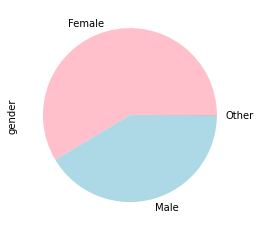

In [52]:
dataset["gender"].value_counts().plot.pie(colors=[ "pink","lightblue","red"])

Come vediamo la percentuale di Other è bassisima rispetto alle altre scelte e essa risulterebbe solo uno spreco di spazio e prestazioni quando trasmormata per il training quindi eliminiamo la riga in cui è presente

In [66]:
dataset =dataset.drop(dataset[dataset["gender"]=="Other"].index.values)
dataset["gender"].value_counts()

Female    2994
Male      2115
Other        0
Name: gender, dtype: int64

é però inoltre importante guardare la presenza di valori sconosciuti (paragonabili a valori nulli) in `smoking_status ` (non visualizzabili con `isna()`)

Questi rappresentano una grande quantità:

In [29]:
(dataset["smoking_status"]=="Unknown").sum()

1544

Togliamo dalle possibilità l'eliminazione delle righe perche graverebbe molto sul quantitativo dei dati. é ipotizzabile la rimozione della colonna ma da ricerche su internet e dai pattern che si evideniano sui grafici i fumatori sembrano avere una probabilità maggiore di avere un ictus

Sono stati analizzati anche gli altri dati (**con particolare attenzione agli estremi**) che sembrano rientrare tutti in una ottica di buon senso. Gli unici dubbi derivano dagli estremi di BMI che risultano un po particolari

# Data Explorarion

Analizziamo ora possibili pattern visibili e identificabili

Primo punto importante che osserviamo è che i dati sono altamente sbilanciati riguarnate la variabile da predire.

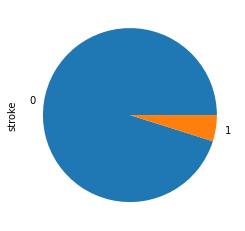

In [67]:
dataset["stroke"].value_counts().plot.pie()

Come si vede i paziendi analizzzati che hanno avuto un ictus sono inferiori al 5% e questo creera problematiche di fitting nella creazione del modello

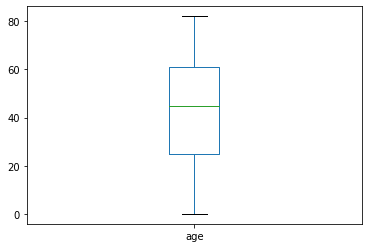

In [73]:
dataset["age"].plot.box()

Notiamo inoltre che l'eta è abbastanza distribuita e che rispecchia con appprossimazione l'età di uno stato

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


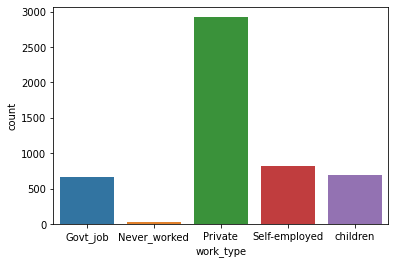

In [82]:
splot.countplot(dataset['work_type'])


Facendo inoltre un semplice controllo sui valori i dati sembrano avere senso rispetto aall'eta delle persene.

Si noti l'alta quantità di persone che lavorano nell'ambito privato che non rispecchia alcuna media statele ma può comunque essere credibile

In [86]:
print((dataset["age"] < 20).value_counts())
print((dataset["work_type"] == "children").value_counts())

False    4143
True      966
Name: age, dtype: int64
False    4422
True      687
Name: work_type, dtype: int64


Si utilizza poi tramite la libreria di Seaborn una mappa di calore per evidenziare gia diverse possibili correlazioni.

In questo modo sono però solo visibili delle correlazioni nelle variabili numeriche escludendo le altre.

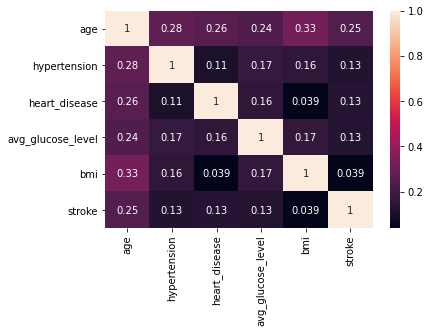

In [87]:
splot.heatmap(dataset.corr(method='pearson'), annot=True)

Non sono presenti correlazione dirette ben identificabili, ma si puo subito identicifare il fatto che i casi di ictus sono relazionati almeno in parte all'età.

In particolare la colonna dell'età sembra essere un buon mappatore rispetto alle altre features e questo ci sembra veritiero grazie alle ricerche scientifiche gia presenti.
(le persone anziane hanno piu probabilità di avere questo tipo di disturbi)



Per questo motivo approfondiamo con un grafico fra età e stroke

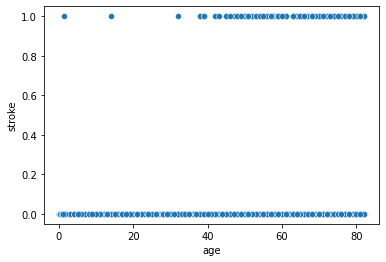

In [90]:
sns.scatterplot(x=dataset['age'], y=dataset['stroke'])

Vediamo subito che la maggior parte dei casi positivi sono concentrati tutti dai 40 agli 80 anni e che quindi l'età è effettivamente un indicatore

Visualizziamo ora gli altri valori per osservare se ci è sfuggito qualcosa

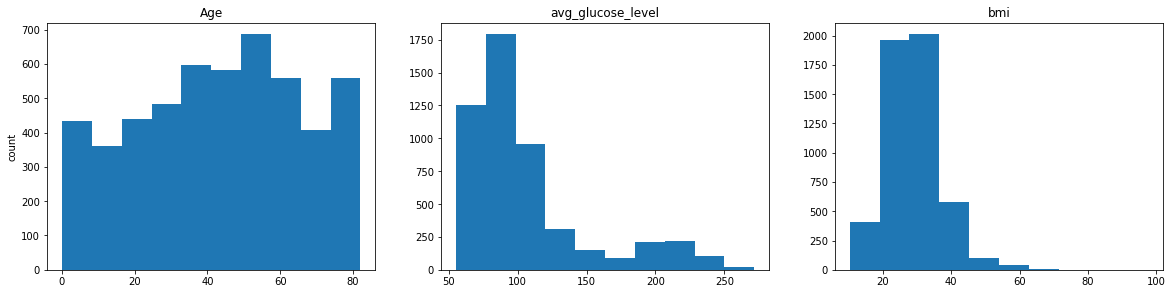

In [105]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('Age')
plt.hist(dataset['age'])
plt.ylabel('count')


plt.subplot(2, 3, 2)
plt.title('avg_glucose_level')
plt.hist(dataset['avg_glucose_level'])


plt.subplot(2, 3, 3)
plt.title('bmi')
plt.hist(dataset['bmi'])


plt.show()

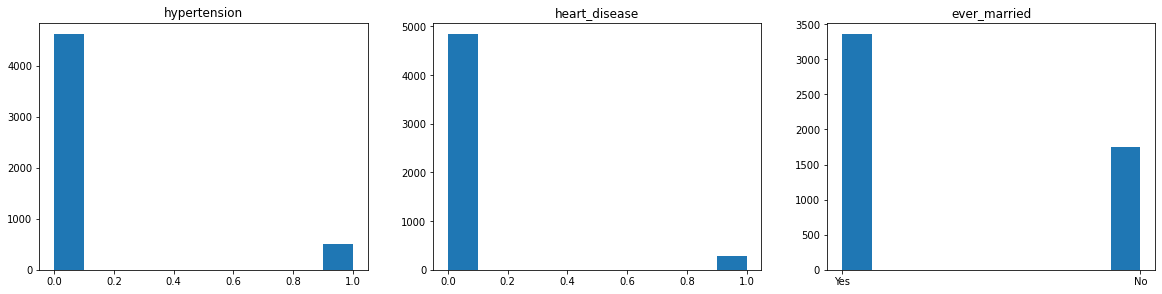

In [106]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.title('hypertension')
plt.hist(dataset['hypertension'])

plt.subplot(2, 3, 2)
plt.title('heart_disease')
plt.hist(dataset['heart_disease'])

plt.subplot(2, 3, 3)
plt.title('ever_married')
plt.hist(dataset['ever_married'])

plt.show()

Osservando il grafico dell'BMI si notano valori molto fuori dalla media della popolazione e alcuni assurdamente alti.

Facendo una ulteriore ricerca su internet i valori anormali sono soot i 20 e sopra i 25 e sono inesistenti valori oltre i 35.

[Qui la pagina wikepedia a riguardo](https://en.wikipedia.org/wiki/Body_mass_index)

Si sceglie quindi di eliminare totalmente la colonna, anche se si ipotizzava potesse essere correlata, perchè reputata con informazioni non adeguate e con errori di misurazione

In [2]:
dataset.drop(dataset["bmi".column()])

NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')